In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


**EDA - Data Analysis (Training data)**

**All helping functions for the program**

In [2]:
# show function will help print data for quick testing
def show(*args):
    for arg in args:
        print(arg, sep='\n')
        
# display option for float values
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# inline printing of matplotlib
%matplotlib inline

**Importing data**

In [3]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [4]:
show(train_data, train_data.shape)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL       65.000     8450   Pave   NaN      Reg   
1        2          20       RL       80.000     9600   Pave   NaN      Reg   
2        3          60       RL       68.000    11250   Pave   NaN      IR1   
3        4          70       RL       60.000     9550   Pave   NaN      IR1   
4        5          60       RL       84.000    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL       62.000     7917   Pave   NaN      Reg   
1456  1457          20       RL       85.000    13175   Pave   NaN      Reg   
1457  1458          70       RL       66.000     9042   Pave   NaN      Reg   
1458  1459          20       RL       68.000     9717   Pave   NaN      Reg   
1459  1460          20       RL       75.000     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

**We have 1460 rows and 81 columns in the data**

In [5]:
# storing all the columns of train_data
all_columns = train_data.columns
all_X = train_data.columns[:-1]
all_y = train_data.columns[-1:]
show(all_X, all_y, all_X.shape, all_y.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**Data Analaysis for all independent variables and Dependent variables**

**Data Analysis - Independent Variables**

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
HeatingQC         0
SaleType          0
TotalBsmtSF       0
BsmtUnfSF         0
Id                0
Length: 80, dtype: int64
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
dtype: int64
(18,)


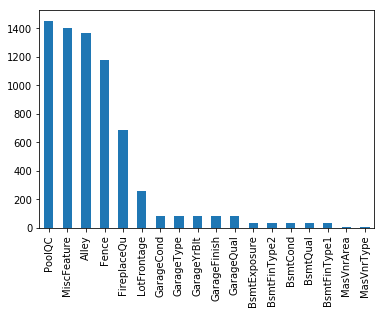

In [6]:
# getting all the null data values in the dataset - X (independent variables)
show(train_data[all_X].isnull().sum().sort_values(ascending=False))
missing_X = train_data[all_X].isnull().sum().sort_values(ascending=False)
missing_X = missing_X[missing_X > 1]
show(missing_X, missing_X.shape)

# We have 19 columns with missing data
missing_X.plot.bar()

In [7]:
# percentage of missing data calculation
missing_X_perc = (train_data[all_X].isnull().sum()/train_data[all_X].isnull().count())*100
missing_X_perc.sort_values(ascending=False)
missing_X_perc[missing_X_perc>0].sort_values(ascending = False)

PoolQC         99.521
MiscFeature    96.301
Alley          93.767
Fence          80.753
FireplaceQu    47.260
LotFrontage    17.740
GarageYrBlt     5.548
GarageType      5.548
GarageFinish    5.548
GarageQual      5.548
GarageCond      5.548
BsmtFinType2    2.603
BsmtExposure    2.603
BsmtFinType1    2.534
BsmtCond        2.534
BsmtQual        2.534
MasVnrArea      0.548
MasVnrType      0.548
Electrical      0.068
dtype: float64

**Data Analysis of SalePrice**

In [8]:
# verifying that there are no missing data in the SalePrice
train_data[all_y].isnull().sum()

SalePrice    0
dtype: int64

**Cleaning the data**

In [9]:
# all the columns with the highest number of missing values
missing_X.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')

In [10]:
# drop the missing columns from the dataset
# specifying 1 in the axis to drop the columns
train_data = train_data.drop(missing_X.index, 1)

In [11]:
# data is cleansed now
show(train_data.columns,missing_X)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')
PoolQC          1453
MiscFeature  

In [12]:
# removing the 1 null value in the Electrical column
train_data = train_data.drop(train_data[train_data['Electrical'].isnull()].index)

In [13]:
# confirming that no null values exist in the train_data
train_data.isnull().sum().max()


0

In [14]:
# Analysing the SalePrice

In [15]:
train_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

In [16]:
train_data['LandContour'].dtype

dtype('O')

**Splitting the data into Quantitative and Qualitative variables**

In [17]:
quan_columns = [col for col in train_data if train_data.dtypes[col] != 'object']
qual_columns = [col for col in train_data if train_data.dtypes[col] == 'object']

In [18]:
show(quan_columns, qual_columns)
show(len(quan_columns) + len(qual_columns))
show(len(quan_columns), len(qual_columns))

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
63
35
28


In [19]:
# removing Id, SalePrice from the Quantitative Columns
quan_columns.remove('Id')
quan_columns.remove('SalePrice')

In [20]:
show(len(quan_columns),len(qual_columns))

33
28


**Graphs - Normal Distribution Analysis for Quantitative Columns vs SalePrice**

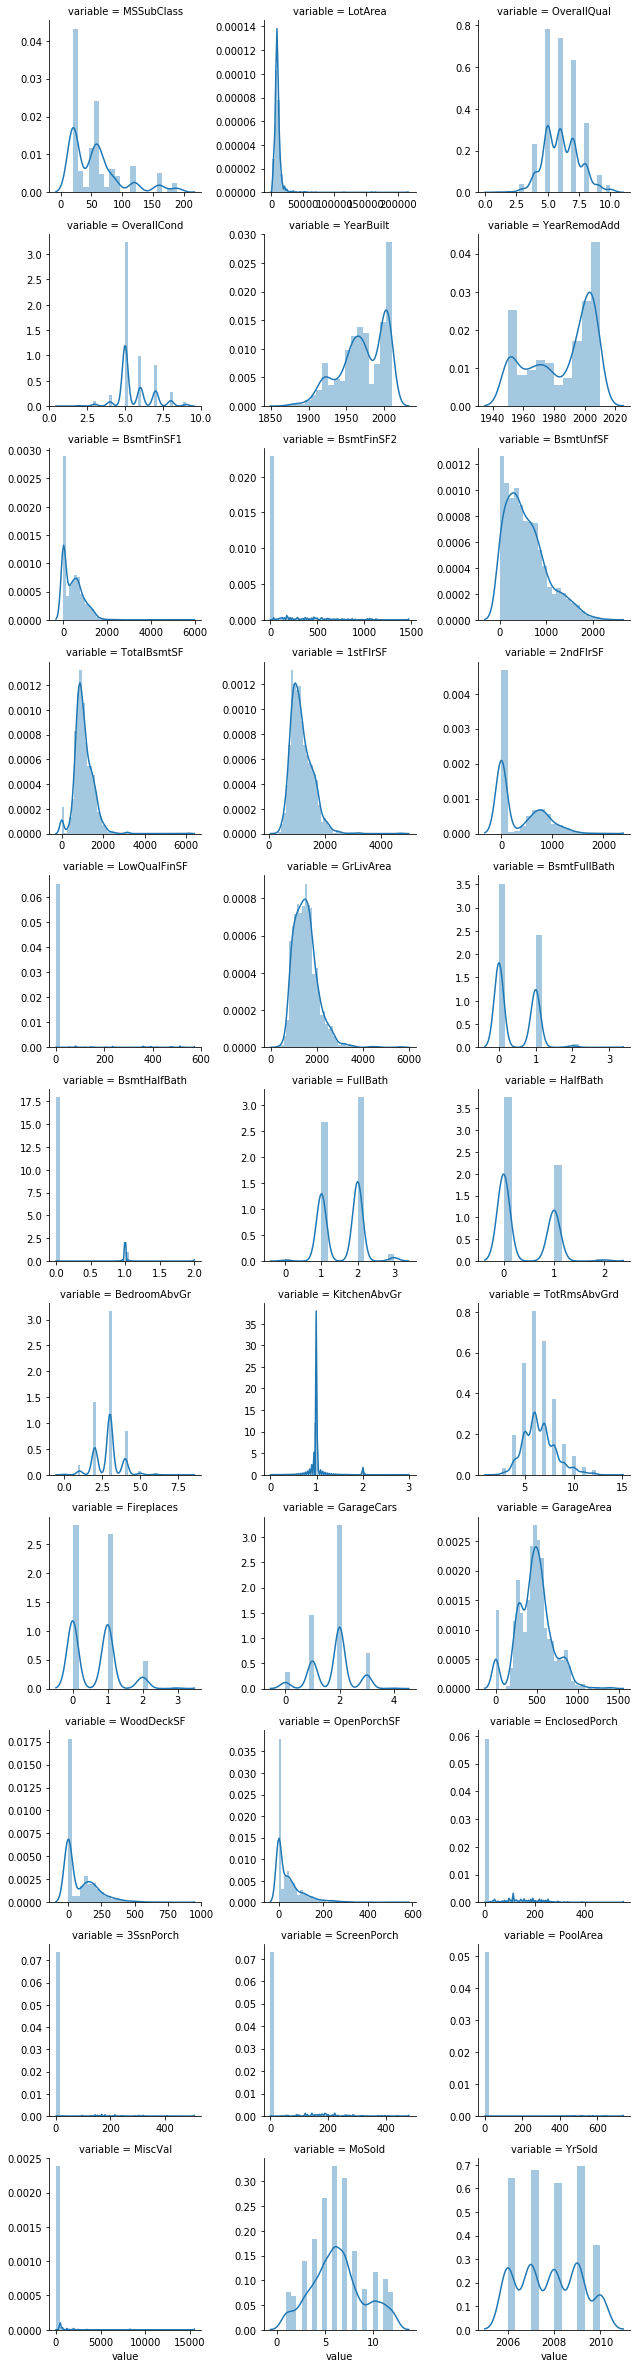

In [21]:
#Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
f = pd.melt(train_data, value_vars = quan_columns)
g = sns.FacetGrid(f, col = 'variable', col_wrap = 3, sharex = False, sharey = False)
g = g.map(sns.distplot, 'value')
#g.savefig('quantitative.png')

In [22]:
quan_columns

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

**Analysing the Qualitative Variables for pvalue**

In [23]:
qual_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [24]:
for i in train_data[qual_columns]:
    print(i, '\t',train_data[i].unique())

MSZoning 	 ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street 	 ['Pave' 'Grvl']
LotShape 	 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 	 ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities 	 ['AllPub' 'NoSeWa']
LotConfig 	 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 	 ['Gtl' 'Mod' 'Sev']
Neighborhood 	 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 	 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 	 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType 	 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 	 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle 	 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl 	 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st 	 ['VinylSd' 'Meta

**Box plot for analysing the Qualitative Data**

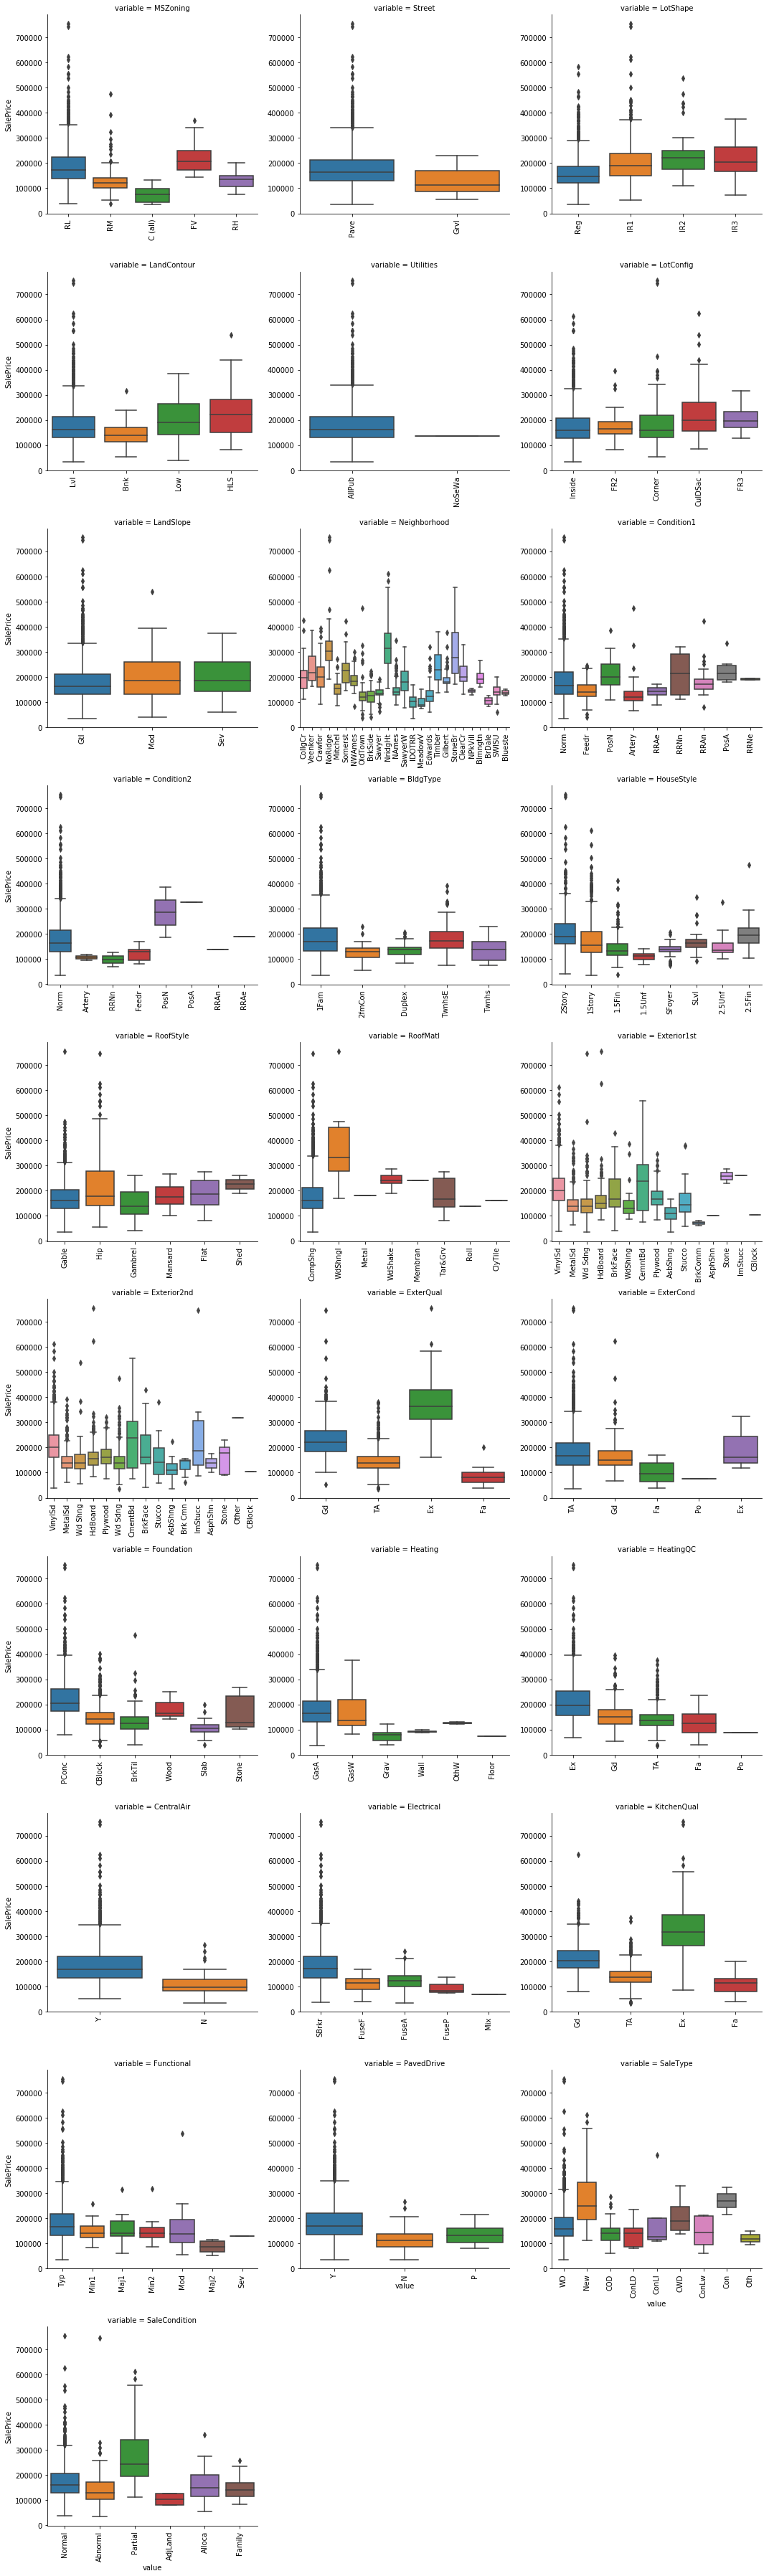

In [25]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train_data, id_vars=['SalePrice'], value_vars=qual_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

#save as fig
#g.savefig('Qualitative_Data_Box_Plots.png')

**ANOVA - Analysis of Variance - Determining pvals for all the Qualitative Columns**

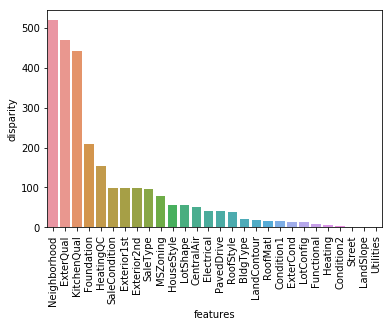

In [26]:
def Anova(frame):
    anv = pd.DataFrame()
    # qual_columns are the qualitative data
    anv['features'] = qual_columns
    pvals = []
    for feature in qual_columns:
        samples = []
        for unique_value_per_variable in frame[feature].unique():
            # adding to samples the each row per the unique values per the variable
            s = frame[frame[feature] == unique_value_per_variable]['SalePrice'].values
            samples.append(s)
        # The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

#building graph
a = Anova(train_data)
a['disparity'] = np.log(1./a['pval'].values)
qual_graph = sns.barplot(data=a, x='features', y='disparity')
x=plt.xticks(rotation=90)
qual_graph

**Results of ANOVA**

In [27]:
a

,features,pval,disparity
7,Neighborhood,0.000,518.209
16,ExterQual,0.000,469.106
23,KitchenQual,0.000,440.958
18,Foundation,0.000,207.970
20,HeatingQC,0.000,153.181
27,SaleCondition,0.000,99.155
14,Exterior1st,0.000,98.158
15,Exterior2nd,0.000,97.536
26,SaleType,0.000,95.009
0,MSZoning,0.000,78.392


In [28]:
show(quan_columns, qual_columns)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [29]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [30]:
train_data['GrLivArea']

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1459, dtype: int64

In [31]:
train_data.shape

(1459, 63)

In [32]:
show(quan_columns, qual_columns)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


**Forming a New Dataset**

In [33]:
new_quan_col = quan_columns
new_qual_col = qual_columns

In [34]:
new_quan_col.remove('TotalBsmtSF')

In [35]:
show(len(new_quan_col),new_quan_col)

32
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [36]:
new_quan_col = ['LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','MoSold','YrSold']
new_qual_col = ['Neighborhood', 'ExterQual', 'KitchenQual', 'Foundation', 'HeatingQC']

In [37]:
# verifying new_quan_col + new_qual_col
show(new_quan_col, new_qual_col)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'MoSold', 'YrSold']
['Neighborhood', 'ExterQual', 'KitchenQual', 'Foundation', 'HeatingQC']


In [38]:
new_train_data = train_data[new_quan_col + new_qual_col]

In [39]:
new_train_data.shape

(1459, 18)

In [40]:
new_train_data

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,MoSold,YrSold,Neighborhood,ExterQual,KitchenQual,Foundation,HeatingQC
0,8450,7,5,2003,2003,856,1710,3,1,8,2,2,2008,CollgCr,Gd,Gd,PConc,Ex
1,9600,6,8,1976,1976,1262,1262,3,1,6,2,5,2007,Veenker,TA,TA,CBlock,Ex
2,11250,7,5,2001,2002,920,1786,3,1,6,2,9,2008,CollgCr,Gd,Gd,PConc,Ex
3,9550,7,5,1915,1970,961,1717,3,1,7,3,2,2006,Crawfor,TA,Gd,BrkTil,Gd
4,14260,8,5,2000,2000,1145,2198,4,1,9,3,12,2008,NoRidge,Gd,Gd,PConc,Ex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,953,1647,3,1,7,2,8,2007,Gilbert,TA,TA,PConc,Ex
1456,13175,6,6,1978,1988,2073,2073,3,1,7,2,2,2010,NWAmes,TA,TA,CBlock,TA
1457,9042,7,9,1941,2006,1188,2340,4,1,9,1,5,2010,Crawfor,Ex,Gd,Stone,Ex
1458,9717,5,6,1950,1996,1078,1078,2,1,5,1,4,2010,NAmes,TA,Gd,CBlock,Gd


**Observations on New dataset**

* LotArea - LotArea could be considered as totally quantitative
* OverallQual - Could be considered as qualitative (as it is in-between 1 to 10)
* OverallCond - Could be considered as qualitative (as it is in-between 1 to 10)
* YearBuilt - Could be considered as qualitative (as it is a year and have a range)
* YearRemodAdd - Could be considered as qualitative (as it is a year and have a range)
* 1stFlrSF - Totally quantitative
* GrLivArea - Totally quantitative
* BedroomAbvGr - Could be considered as qualitative (as it is a range)
* KitchenAbvGr - Could be considered as qualitative (as it has a range)
* TotRmsAbvGrd - Could be considered as qualitative (as it has a range)
* GarageCars - Could be considered as qualitative (as it has a range)
* MoSold - Should be used in collaboration with YrSold
* YrSold - Should be used in collaboration with MoSold
* Neighborhood - Will remain categorical
* ExterQual - Will remain categorical
* KitchenQual - Will remain categorical
* Foundation - Will remain categorical
* HeatingQC - Will remain categorical
* New Column - MoSold_YrSold - will remain categorical

In [41]:
new_train_data[['MoSold','YrSold']]
new_train_data['MoSold_YrSold'] = new_train_data["MoSold"].astype(str) + new_train_data["YrSold"].astype(str)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
show(new_train_data, new_train_data.shape)

      LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  1stFlrSF  \
0        8450            7            5       2003          2003       856   
1        9600            6            8       1976          1976      1262   
2       11250            7            5       2001          2002       920   
3        9550            7            5       1915          1970       961   
4       14260            8            5       2000          2000      1145   
...       ...          ...          ...        ...           ...       ...   
1455     7917            6            5       1999          2000       953   
1456    13175            6            6       1978          1988      2073   
1457     9042            7            9       1941          2006      1188   
1458     9717            5            6       1950          1996      1078   
1459     9937            5            6       1965          1965      1256   

      GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Gara

In [43]:
new_train_data = new_train_data.drop(['MoSold','YrSold'], axis=1)

In [44]:
show(new_train_data.shape, new_train_data.columns)
show(new_train_data)

(1459, 17)
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageCars', 'Neighborhood', 'ExterQual', 'KitchenQual', 'Foundation',
       'HeatingQC', 'MoSold_YrSold'],
      dtype='object')
      LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  1stFlrSF  \
0        8450            7            5       2003          2003       856   
1        9600            6            8       1976          1976      1262   
2       11250            7            5       2001          2002       920   
3        9550            7            5       1915          1970       961   
4       14260            8            5       2000          2000      1145   
...       ...          ...          ...        ...           ...       ...   
1455     7917            6            5       1999          2000       953   
1456    13175            6            6       1978          1988     

In [45]:
# Now we have cleansed data

In [46]:
new_train_data['SalePrice'] = train_data['SalePrice']

In [47]:
new_train_data.shape

(1459, 18)

In [48]:
#Splitting 17 columns as X and the target 'SalePrice' as y
X = new_train_data.iloc[:,:-1].values
y = new_train_data.iloc[:,17].values

In [49]:
show(X, y)
show(X.shape, y.shape)

[[8450 7 5 ... 'PConc' 'Ex' '22008']
 [9600 6 8 ... 'CBlock' 'Ex' '52007']
 [11250 7 5 ... 'PConc' 'Ex' '92008']
 ...
 [9042 7 9 ... 'Stone' 'Ex' '52010']
 [9717 5 6 ... 'CBlock' 'Gd' '42010']
 [9937 5 6 ... 'CBlock' 'Gd' '62008']]
[208500 181500 223500 ... 266500 142125 147500]
(1459, 17)
(1459,)


In [50]:
new_train_data

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageCars,Neighborhood,ExterQual,KitchenQual,Foundation,HeatingQC,MoSold_YrSold,SalePrice
0,8450,7,5,2003,2003,856,1710,3,1,8,2,CollgCr,Gd,Gd,PConc,Ex,22008,208500
1,9600,6,8,1976,1976,1262,1262,3,1,6,2,Veenker,TA,TA,CBlock,Ex,52007,181500
2,11250,7,5,2001,2002,920,1786,3,1,6,2,CollgCr,Gd,Gd,PConc,Ex,92008,223500
3,9550,7,5,1915,1970,961,1717,3,1,7,3,Crawfor,TA,Gd,BrkTil,Gd,22006,140000
4,14260,8,5,2000,2000,1145,2198,4,1,9,3,NoRidge,Gd,Gd,PConc,Ex,122008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,2000,953,1647,3,1,7,2,Gilbert,TA,TA,PConc,Ex,82007,175000
1456,13175,6,6,1978,1988,2073,2073,3,1,7,2,NWAmes,TA,TA,CBlock,TA,22010,210000
1457,9042,7,9,1941,2006,1188,2340,4,1,9,1,Crawfor,Ex,Gd,Stone,Ex,52010,266500
1458,9717,5,6,1950,1996,1078,1078,2,1,5,1,NAmes,TA,Gd,CBlock,Gd,42010,142125


0 LotArea - LotArea could be considered as totally quantitative
1 OverallQual - Could be considered as qualitative (as it is in-between 1 to 10)
2 OverallCond - Could be considered as qualitative (as it is in-between 1 to 10)
3 YearBuilt - Could be considered as qualitative (as it is a year and have a range)
4 YearRemodAdd - Could be considered as qualitative (as it is a year and have a range)
5 1stFlrSF - Totally quantitative
6 GrLivArea - Totally quantitative
7 BedroomAbvGr - Could be considered as qualitative (as it is a range)
8 KitchenAbvGr - Could be considered as qualitative (as it has a range)
9 TotRmsAbvGrd - Could be considered as qualitative (as it has a range)
10 GarageCars - Could be considered as qualitative (as it has a range)
11 Neighborhood - Will remain categorical
12 ExterQual - Will remain categorical
13 KitchenQual - Will remain categorical
14 Foundation - Will remain categorical
15 HeatingQC - Will remain categorical
16 MoSold_YrSold - Will be considered categorical
17 SalePrice - Target (Will remain quantitative)

Columns 1,2,3,4,7 to 16 - Could be considered Categorical for decision tree.


In [51]:
# importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [52]:
labelencoder_X = LabelEncoder()

In [53]:
labelencoder_X

LabelEncoder()

In [54]:
# applying label encoder on X
X[:,16] = labelencoder_X.fit_transform(X[:, 16])

In [55]:
# Applied label encoder on the columns 1,2,3,4,7 to 16

In [56]:
# Applying one hot encoder on the columsn 1,2,3,4,7 to 16

In [57]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [58]:
onehotencoder

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [59]:
onehotencoder_X = OneHotEncoder(categorical_features = [1,2,3,4,7,8,9,10,11,12,13,14,15,16])

In [60]:
#Applying one hot encoder on the required columns
X= onehotencoder_X.fit_transform(X).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


ValueError: could not convert string to float: 'CollgCr'

In [61]:
#testing
X.shape

(1459, 17)

In [62]:
# train test split out of 1459, 323 dataframe
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [63]:
show(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1167, 17)
(292, 17)
(1167,)
(292,)


**Decision Tree Implemenatation**

In [64]:
# fitting the decision tree regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

ValueError: could not convert string to float: 'Crawfor'

In [65]:
y_pred = regressor.predict(X_test)

NotFittedError: This DecisionTreeRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [66]:
y_pred.shape

NameError: name 'y_pred' is not defined

In [67]:
y_test.shape

(292,)

In [68]:
# determining error rate between y_pred and y_test
# error function
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

In [69]:
error(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [70]:
y_test

array([179900,  91300,  90000, 135960, 156000, 130000, 141000, 174000,
        75000, 109008,  98300, 325000,  91000, 226700, 301500, 155000,
       173733, 415298, 281213, 177000, 287000, 100000, 149350, 208900,
        82500, 175000, 165000, 324000,  67000, 403000, 123600, 142500,
       149900, 137900, 212900, 277500,  89471, 190000,  97000, 119000,
       110000, 151000, 263000,  84500, 132500, 243000, 230000, 213490,
       119900, 320000, 147000, 151000,  52500,  72500, 132000, 139500,
       201000, 235000, 378500, 127500, 239900, 274970, 190000, 250000,
       117500, 154000,  82500, 234000,  87500, 175900, 118000, 185000,
       180500, 133000, 132500, 125500, 318000, 146500, 313000, 170000,
       192140, 115000, 192000, 301000, 538000, 112000, 239000, 178400,
       260000, 174000, 191000, 125000, 161500, 139000, 157000, 134000,
       129900, 176000, 100000, 154000, 175000, 112000, 207000, 184000,
       260000, 143000, 173000, 325000,  86000, 251000, 106250, 145000,
      

**Conclusion**

.22 error rate